학습목표

다항 선형 회귀(Multivariable Linear regression)에 대해 알아본다.
핵심키워드

* 다항 선형 회귀(Multivariable Linear regression)
* 가설 함수(Hypothesis Function)
* 평균 제곱 오차(Mean Squared Error)
* 경사하강법(Gradient descent)

다항 선형 회귀란? 여러 요소를 종합적으로 고려하여 한 가지 항목 값을 예측하는 것

In [3]:
import torch

## DATA

In [4]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 98],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

### Multivariate Hypothesis Function: Naive

In [5]:
# variate들의 개수가 3개일 경우 H(x) 계산
hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

NameError: name 'x1_train' is not defined

이런식으로 계산한다면 고려해야 할 변수가 1000개일 경우 일일히 코드로 나열해 주어야 하기에 막막

### Multivatiate Hypothesis Function: using Matrix!
Matmul로 한번에 계산!
  * 더 간결하고,
  * x벡터의 길이가 바뀌어도 코드를 바꿀 필요가 없고,
  * 속도도 더 빠르다!

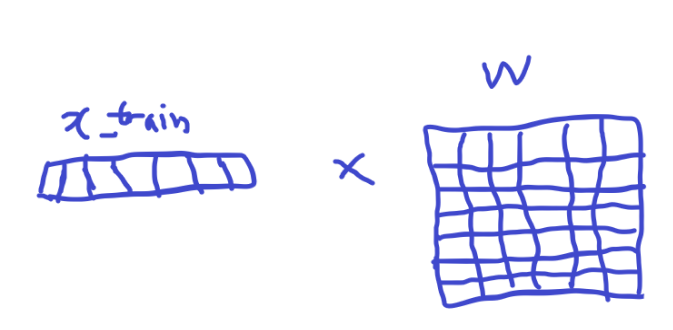

In [6]:
# H(x) 계산
hypothesis = x_train.matmul(W) + b # or .mm or @

NameError: name 'W' is not defined

---

In [ ]:
# cost func은 simple linear regression과 같다.
cost = torch.mean((hypothesis - y_train)**2)

In [7]:
# optimizer 설정 역시 마찬가지로 linear regression과 같다.
from torch import optim
# optimizer 설정
optimizer = optim.SGD([W, b], lr = 1e-5)

# 파라미터 갱신(학습)
optimizer.zero_grad()
cost.backward()
optimizer.step()

NameError: name 'W' is not defined

---

## Full Code w/ torch.optim
loss 미분하여 gradient 직접 계산할 필요 x
역전파(.backward())와 파라미터 갱신(.step()) 편리

In [4]:
import torch
from torch import optim

# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 98],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 모델 초기화
W = torch.zeros((3,1), requires_grad = True)  # x_train과 행렬곱하기에 맞는 형태
b = torch.zeros(1, requires_grad = True)

# optimizer 설정
optimizer = optim.SGD([W,b], lr = 1e-5)

#---반복문 시작---
nb_epochs = 20
for epoch in range(nb_epochs):
    # 모델로 예측 및 loss값 구하기
    hypothesis = x_train.mm(W) + b # .matmul or @
    loss = torch.mean((hypothesis - y_train) ** 2)
    
    # loss와 optimizer 규칙을 이용해 파라미터 갱신
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print('Epoch {:1d}/{} hypothesis: {} Loss: {:.6f}'.format(epoch, nb_epochs, hypothesis.squeeze().detach(), loss.item()
                                                             ))

Epoch 0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Loss: 29661.800781
Epoch 1/20 hypothesis: tensor([67.5353, 82.6892, 79.9853, 87.1094, 61.9195]) Loss: 9174.958984
Epoch 2/20 hypothesis: tensor([105.0937, 128.6752, 124.4676, 135.5535,  96.3549]) Loss: 2838.756104
Epoch 3/20 hypothesis: tensor([125.9811, 154.2494, 149.2055, 162.4948, 115.5056]) Loss: 879.086731
Epoch 4/20 hypothesis: tensor([137.5971, 168.4720, 162.9631, 177.4777, 126.1560]) Loss: 272.996552
Epoch 5/20 hypothesis: tensor([144.0571, 176.3817, 170.6141, 185.8100, 132.0791]) Loss: 85.543961
Epoch 6/20 hypothesis: tensor([147.6497, 180.7805, 174.8690, 190.4439, 135.3732]) Loss: 27.568161
Epoch 7/20 hypothesis: tensor([149.6475, 183.2268, 177.2353, 193.0209, 137.2053]) Loss: 9.637270
Epoch 8/20 hypothesis: tensor([150.7586, 184.5872, 178.5513, 194.4540, 138.2242]) Loss: 4.091321
Epoch 9/20 hypothesis: tensor([151.3764, 185.3438, 179.2832, 195.2510, 138.7910]) Loss: 2.375918
Epoch 10/20 hypothesis: tensor([151.7200, 185.764

* 점점 줄어드는 loss
* 점점 y_train과 가까워지는 hypothesis
* Learing Rate에 따라 발산할지도

---

W, bf를 일일이 써주는 것은 모델이 커질수록 귀찮아진다.(아래 부분)

In [5]:
'''
# 모델 초기화
W = torch.zeros((3,1), requires_grad = True)  # x_train과 행렬곱하기에 맞는 형태
b = torch.zeros(1, requires_grad = True)

# 모델로 예측 및 loss값 구하기
hypothesis = x_train.mm(W) + b # .matmul or @
'''

'이 부분\n모델 초기화W = torch.zeros((3,1), requires_grad = True)  # x_train과 행렬곱하기에 맞는 형태\nb = torch.zeros(1, requires_grad = True)\n\n모델로 예측 및 loss값 구하기\nhypothesis = x_train.mm(W) + b # .matmul or @\n'

이 때 torch의 nn.Module 활용!

In [ ]:
import torch.nn as nn

class MultivariateLinearRegressionModel(nn.Module):
    # 대충 여기서 x_train과 행렬곱할 W의 shape 정해주는 듯
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3,1)
    # 여기서 모델이 어떻게 연산을 수행할 것인지 정해줌
    def forward(self, x):
        return self.linear(x)

model = MultivariateLinearRegressionModel()
hypothesis = model(x_train)

* nn.Module을 상속해서 모델 생성
* nn.Linear(3,1)
    * 입력차원: 3
    * 출력차원: 1
* hypothesis 계산은 forward() 에서!
* gradient계산은 pytorch가 알아서 해준다. backward()

Pytorch에서는 다양한 Cost Functions를 제공하기도 한다.

In [ ]:
# 기존의 Cost 계산하던 방식
loss = torch.mean((hypothesis - y_train)**2)

In [ ]:
# torch에서 제공하는 Cost Function 활용!
from torch.nn.functional as F

cost = F.mse_loss(hypothesis, y_train)  #hypothesis는 predict한 결과

* torch.nn.functional에서 제공하는 loss function사용
* 장점: 쉽게 다른 loss로 교체 가능!(l1_loss, smooth_l1_loss, 등...)

## Full code w/ torch.optim

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 98],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])


# 모델 불러오기
class MultivariateLinearRegressionModel(nn.Module):
    # 대충 여기서 x_train과 행렬곱할 W의 shape 정해주는 듯
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3,1)
    # 여기서 모델이 어떻게 연산을 수행할 것인지 정해줌
    def forward(self, x):
        return self.linear(x)
    
# 모델 초기화(not 파라미터 초기화 anymore)
# W = torch.zero((3,1), requires_grad = True)
# b = torch.zero(1, requires_grad = True)
model = MultivariateLinearRegressionModel()

# optimizer정의
optimizer = optim.SGD(model.parameters(), lr = 1e-5)

# 예측, loss계산, gradient이용한 역전파 및 파라미터 갱신을 입력값의 수만큼 for loop으로 돌리기
nb_epochs = 20
for epoch in range(nb_epochs):
    # H(x) 계산
    # (x)hypothesis = x_train.mm(W) + b # .matmul or @    
    hypothesis = model(x_train)
    
    # loss 계산
    # (x) loss = torch.mean((hypothesis - y_train)**2)
    loss = F.mse_loss(hypothesis, y_train)
    
    # loss로 모델 파라미터 개선
    optimizer.zero_grad() #초기화
    loss.backward() #역전파(gradient 계산)
    optimizer.step() # 역전파 결과 토대로 파라미터 개선
    
    print('Epoch: {:1d}/{} hypothesis: {} Loss: {:.6f}'.format(epoch, nb_epochs, hypothesis.squeeze().detach(), loss.item()))
    


Epoch: 0/20 hypothesis: tensor([-45.5001, -60.9193, -55.8177, -61.4504, -45.3304]) Loss: 51293.195312
Epoch: 1/20 hypothesis: tensor([43.3073, 47.8168, 49.3618, 53.0974, 36.0935]) Loss: 15867.400391
Epoch: 2/20 hypothesis: tensor([ 92.6955, 108.2886, 107.8552, 116.8009,  81.3762]) Loss: 4910.855957
Epoch: 3/20 hypothesis: tensor([120.1614, 141.9191, 140.3851, 152.2283, 106.5595]) Loss: 1522.197266
Epoch: 4/20 hypothesis: tensor([135.4357, 160.6224, 158.4758, 171.9304, 120.5651]) Loss: 474.146881
Epoch: 5/20 hypothesis: tensor([143.9298, 171.0242, 168.5366, 182.8873, 128.3544]) Loss: 150.001633
Epoch: 6/20 hypothesis: tensor([148.6533, 176.8092, 174.1315, 188.9807, 132.6865]) Loss: 49.748146
Epoch: 7/20 hypothesis: tensor([151.2798, 180.0267, 177.2429, 192.3693, 135.0961]) Loss: 18.740133
Epoch: 8/20 hypothesis: tensor([152.7400, 181.8164, 178.9731, 194.2537, 136.4364]) Loss: 9.148132
Epoch: 9/20 hypothesis: tensor([153.5518, 182.8120, 179.9352, 195.3016, 137.1821]) Loss: 6.179828
Epoch

다음 주제: Pytorch에서는 많은 양의 데이터를 어떻게 다룰까요?